Perceptron Simples com Sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

# Imports

In [15]:
from sklearn import preprocessing # biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # biblioteca para separação de amostras para treino e teste
from sklearn.linear_model import Perceptron # biblioteca com funções para a execução da RNA Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # funções para avaliação de desempenho do modelo
from sklearn import metrics # biblioteca para obtenção de métricas para avaliação dos modelos
import matplotlib.pyplot as plt # biblioteca para plotar gráfico
import numpy as np
import pandas as pd
import random # biblioteca aplicada na geração de números randômicos

# Introdução

Este código tem como objetivo classificar os 3 tipos de flor the Iris de acordo com suas características da pétala e da sépala. Abaixo a imagem da flor e suas diferentes características:

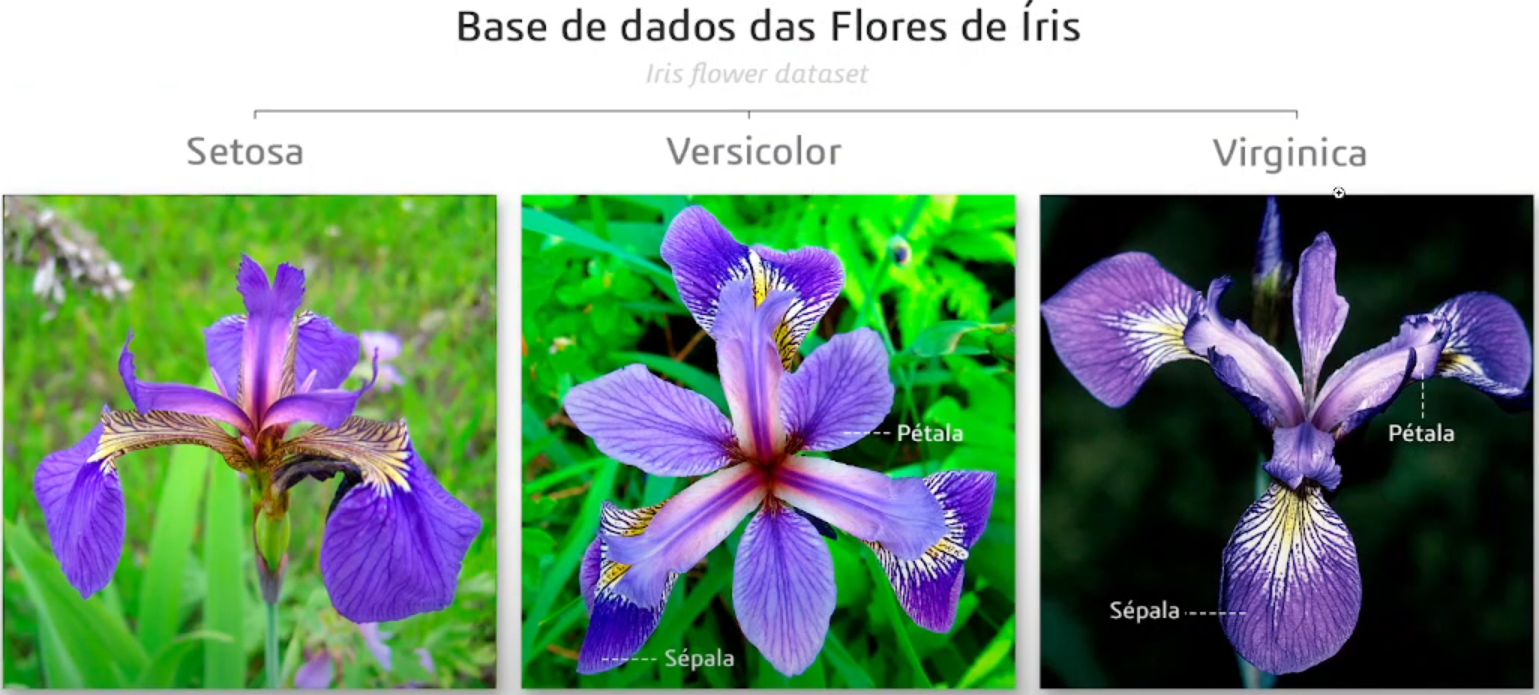

In [16]:
# Importando os dados do arquivo csv para criação do DataFrame
df = pd.read_csv('irisMLP.csv')
display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
# Separar as 100 primeiras linhas do dataset para classificação binária
y = df.iloc[0:100, 4].values
display(y)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [18]:
# Substitui o valor string em numérico, baseado no que determina a função de ativação
y = np.where(y == 'Iris-setosa', -1, 1)
display(y)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [19]:
# Separando as colunas com as variáveis das 100 primeiras amostras do dataset para determinar os inputs da RNA
X = df.iloc[0:100, [0,1,2,3]].values
display(X)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
# Normalização dos dados kslearn - dados entre 0 e 1
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
display(X)

array([[0.2962963 , 0.625     , 0.09756098, 0.05882353],
       [0.22222222, 0.41666667, 0.09756098, 0.05882353],
       [0.14814815, 0.5       , 0.07317073, 0.05882353],
       [0.11111111, 0.45833333, 0.12195122, 0.05882353],
       [0.25925926, 0.66666667, 0.09756098, 0.05882353],
       [0.40740741, 0.79166667, 0.17073171, 0.17647059],
       [0.11111111, 0.58333333, 0.09756098, 0.11764706],
       [0.25925926, 0.58333333, 0.12195122, 0.05882353],
       [0.03703704, 0.375     , 0.09756098, 0.05882353],
       [0.22222222, 0.45833333, 0.12195122, 0.        ],
       [0.40740741, 0.70833333, 0.12195122, 0.05882353],
       [0.18518519, 0.58333333, 0.14634146, 0.05882353],
       [0.18518519, 0.41666667, 0.09756098, 0.        ],
       [0.        , 0.41666667, 0.02439024, 0.        ],
       [0.55555556, 0.83333333, 0.04878049, 0.05882353],
       [0.51851852, 1.        , 0.12195122, 0.17647059],
       [0.40740741, 0.79166667, 0.07317073, 0.17647059],
       [0.2962963 , 0.625     ,

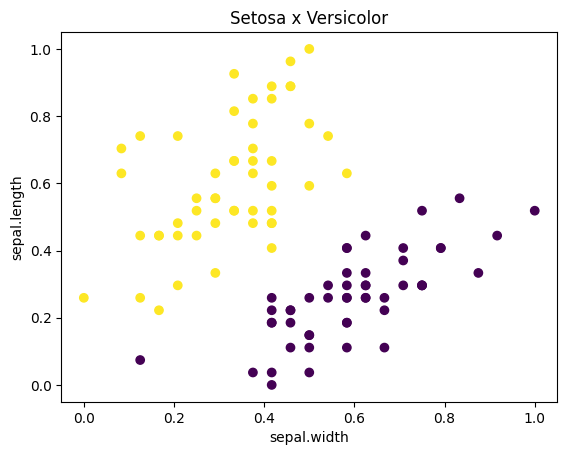

In [21]:
# Plot do gráfico para verificar se as amostras são linearmente separáveis - Sépalas
plt.scatter(X[:,1],X[:,0], c=y)
plt.title('Setosa x Versicolor')
plt.xlabel('sepal.width')
plt.ylabel('sepal.length')
plt.show()

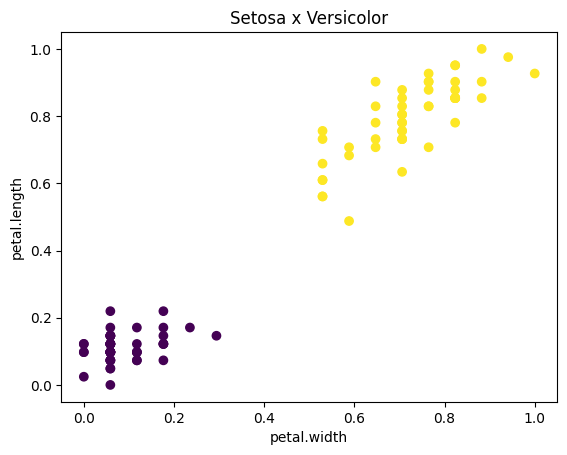

In [22]:
# Plot do gráfico para verificar se as amostras são linearmente separáveis - Pétalas
plt.scatter(X[:,3],X[:,2], c=y)
plt.title('Setosa x Versicolor')
plt.xlabel('petal.width')
plt.ylabel('petal.length')
plt.show()

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=12)
display(X_train)
display(X_test)
display(Y_train)
display(Y_test)

array([[0.44444444, 0.16666667, 0.65853659, 0.52941176],
       [0.88888889, 0.45833333, 0.82926829, 0.76470588],
       [0.40740741, 0.41666667, 0.85365854, 0.82352941],
       [0.44444444, 0.25      , 0.82926829, 0.64705882],
       [0.48148148, 0.41666667, 0.75609756, 0.70588235],
       [0.14814815, 0.5       , 0.14634146, 0.05882353],
       [0.03703704, 0.41666667, 0.07317073, 0.05882353],
       [0.88888889, 0.41666667, 0.97560976, 0.94117647],
       [0.25925926, 0.625     , 0.07317073, 0.11764706],
       [0.62962963, 0.375     , 0.85365854, 0.82352941],
       [0.40740741, 0.58333333, 0.17073171, 0.05882353],
       [0.40740741, 0.70833333, 0.12195122, 0.05882353],
       [0.33333333, 0.58333333, 0.09756098, 0.05882353],
       [0.51851852, 0.375     , 0.7804878 , 0.70588235],
       [0.51851852, 0.41666667, 0.7804878 , 0.64705882],
       [0.66666667, 0.33333333, 0.73170732, 0.70588235],
       [0.66666667, 0.33333333, 0.90243902, 0.64705882],
       [0.74074074, 0.20833333,

array([[0.2962963 , 0.625     , 0.09756098, 0.11764706],
       [0.07407407, 0.125     , 0.07317073, 0.11764706],
       [0.55555556, 0.25      , 0.73170732, 0.64705882],
       [0.55555556, 0.83333333, 0.04878049, 0.05882353],
       [0.7037037 , 0.08333333, 0.85365854, 0.82352941],
       [0.40740741, 0.58333333, 0.12195122, 0.17647059],
       [0.44444444, 0.20833333, 0.73170732, 0.70588235],
       [0.51851852, 1.        , 0.12195122, 0.17647059],
       [0.2962963 , 0.70833333, 0.12195122, 0.17647059],
       [0.25925926, 0.        , 0.6097561 , 0.52941176],
       [0.18518519, 0.41666667, 0.09756098, 0.        ],
       [0.03703704, 0.375     , 0.09756098, 0.05882353],
       [0.2962963 , 0.58333333, 0.12195122, 0.05882353],
       [0.22222222, 0.45833333, 0.12195122, 0.        ],
       [0.25925926, 0.58333333, 0.12195122, 0.05882353],
       [0.59259259, 0.5       , 0.92682927, 1.        ],
       [0.85185185, 0.375     , 0.87804878, 0.70588235],
       [0.18518519, 0.58333333,

array([ 1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
        1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
       -1,  1])

array([-1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1])

In [24]:
p = Perceptron(random_state=42, eta0=0.01, alpha=0.1)
p.fit(X_train, Y_train)

,penalty,None
,alpha,0.1
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,eta0,0.01
,n_jobs,None
,random_state,42


In [25]:
prediction_train = p.predict(X_train)
prediction_test = p.predict(X_test)
train_score = accuracy_score(prediction_train, Y_train)
print("Acurácia com dados de treinamento: ", train_score)
test_score = accuracy_score(prediction_test, Y_test)
print("Acurácia com dados de teste: ", test_score)

print(classification_report(prediction_test, Y_test))
print("Número de épocas no treinamento: ", p.n_iter_)
print("Lista de parâmetros configurados na Perceptron: ", p.get_params())

Acurácia com dados de treinamento:  1.0
Acurácia com dados de teste:  1.0
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Número de épocas no treinamento:  6
Lista de parâmetros configurados na Perceptron:  {'alpha': 0.1, 'class_weight': None, 'early_stopping': False, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


[]

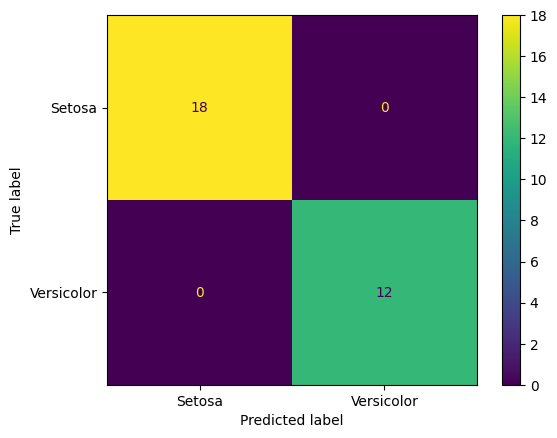

In [26]:
# Apresentação do gráfico de matriz de confusão
conf_matrix = confusion_matrix(Y_test, prediction_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Setosa', 'Versicolor'])
cm_display.plot()
plt.plot()

In [27]:
# Teste individual de amostras já normalizadas
A = np.array([0.4329,-1.3719,0.7022,-0.8535]) # Padrão correto = 1
A_y = np.array([1])
B = np.array([-0.3024,-0.2286,-0.8630,-2.7909]) # Padrão correto = -1
B_y = np.array([-1])

prediction_A = p.predict([A])
prediction_B = p.predict([B])
print("Acurácia com dados de A: ", accuracy_score(prediction_A, A_y))
print("Acurária com dados de B: ", accuracy_score(prediction_B, B_y))

Acurácia com dados de A:  1.0
Acurária com dados de B:  1.0
